In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col, sum, when, avg, row_number
from pyspark.sql.window import Window

In [0]:
from pyspark.sql import SparkSession
#creating session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", IntegerType(), True),
    StructField("team_bowling", IntegerType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True),
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-dataset-09/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # using IntegerType for 'year'
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True),
])
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-dataset-09/Match.csv")

In [0]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType, BooleanType

Player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
Player_match_df = spark.read.schema(Player_match_schema).format("csv").option("header","true").load("s3://ipl-dataset-09/Player_match.csv")
Player_match_df.createOrReplaceTempView("Player_match")


In [0]:
Player_schema = StructType([
   StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
])
Player_df = spark.read.schema(Player_schema).format("csv").option("header","true").load("s3://ipl-dataset-09/Player.csv")

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

# Player Schema
Player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
])

# Player_match Schema
Player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True),
])

# Match Schema
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True),
])

# Use the correct date format: update if your CSV uses "MM/dd/yyyy" instead
date_format = "M/d/yyyy"

# Load all 3 key DataFrames with correct date parsing
Player_df = spark.read.schema(Player_schema)\
    .option("header", "true")\
    .option("dateFormat", date_format)\
    .csv("s3://ipl-dataset-09/Player.csv")

Player_match_df = spark.read.schema(Player_match_schema)\
    .option("header", "true")\
    .option("dateFormat", date_format)\
    .csv("s3://ipl-dataset-09/Player_match.csv")

match_df = spark.read.schema(match_schema)\
    .option("header", "true")\
    .option("dateFormat", date_format)\
    .csv("s3://ipl-dataset-09/Match.csv")


In [0]:
Team_schema = StructType([
   StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
])
Team_df = spark.read.schema(Team_schema).format("csv").option("header","true").load("s3://ipl-dataset-09/Team.csv")

In [0]:
#need to exclude wides and noballs from the dataset
ball_by_ball_df = ball_by_ball_df.filter((col("wides") ==0) & (col("Noballs")==0))

#calculate the total & average runs scored in each match & innings.
total_and_avg_runs = ball_by_ball_df.groupBy("MatcH_id","Innings_No").agg(
    sum("Runs_Scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

#window function: calculate running function in each match for each over
windowSpec = Window.partitionBy("MatcH_id","Innings_No").orderBy("Over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#conditional column: Flag for high impact balls like wicket or more than 6 runs scored including extras

ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("Runs_Scored") + col("Extra_runs") > 6)| (col("Bowler_Wicket") == True), True). otherwise(False)
)

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

#extracting year, month and day from the match date for mmore detailed time based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

#high margin wins, categorizing wins in high, medium and low margin wins

match_df = match_df.withColumn(
    "win_margin_category",
    when(col("Win_Margin") > 100, "High")
         .when(col("Win_Margin") >= 50, "Medium")
         .otherwise("Low")
)

#analyze if the toss winner is the match winner

match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("Toss_Winner") == col("match_winner"), "Yes").otherwise("No")
)

#show enhance match dataframe

match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
Player_df.select("dob").show(5)
Player_match_df.select("dob").show(5)
match_df.select("match_date").show(5)


+----------+
|       dob|
+----------+
|      null|
|1981-09-27|
|1974-12-19|
|1977-07-15|
|1980-10-17|
+----------+
only showing top 5 rows

+----------+
|       dob|
+----------+
|      null|
|1978-02-16|
|      null|
|1975-10-16|
|1983-08-18|
+----------+
only showing top 5 rows

+----------+
|match_date|
+----------+
|2008-04-18|
|2008-04-19|
|2008-04-19|
|2008-04-20|
|2008-04-20|
+----------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import lower, regexp_replace

#normalizing and cleaning player names
#Player_df = Player_df.withColumn("player_name", lower(regexp_replace("player_name","[^a-zA-Z0-9]", "")))

#handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
Player_df = Player_df.na.fill({"batting_hand":"unknown", "bowling_skill":"unknown"})

#categorizing players based on batting hand
Player_df = Player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"),"Left-Handed").otherwise ("Right-Handed")
)
#show modified player dataframe
Player_df.show(2)

+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name|       dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
|        0|        1| SC Ganguly|      null| Left-hand bat|Right-arm medium|       India|  Left-Handed|
|        1|        2|BB McCullum|1981-09-27|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----------+--------------+----------------+------------+-------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr

#Add veteran status based on age

Player_match_df = Player_match_df.withColumn(
    "Veteran_status",
    when(col("age_as_on_match") >= 35,"Veteran").otherwise("Non-Veteran")
)

#excluding the bench players. (Only playing ones are included)

Player_match_df = Player_match_df.filter(col("batting_status") != "Did not bat")

#dynamic filter to see years since debut

Player_match_df = Player_match_df.withColumn(
    "Years_since_debut",
    (year(current_date()) - col("season_year"))
)

#show the enriched dataFrame

Player_match_df.show(2)

In [0]:
# Re-register views with correct references (case-sensitive and clean)
Player_df.createOrReplaceTempView("player")
Player_match_df.createOrReplaceTempView("player_match")
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")

# Final working SQL
top_scorers = spark.sql("""
SELECT
  p.player_name,
  m.season_year,
  SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON b.striker = pm.player_id AND b.match_id = pm.match_id
JOIN player p ON pm.player_id = p.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")
top_scorers.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       SE Marsh|       2008|       614|
|      G Gambhir|       2008|       532|
|  ST Jayasuriya|       2008|       508|
|      SR Watson|       2008|       463|
|       GC Smith|       2008|       437|
|   AC Gilchrist|       2008|       431|
|      YK Pathan|       2008|       430|
|       SK Raina|       2008|       420|
|       MS Dhoni|       2008|       414|
|       V Sehwag|       2008|       399|
|      RG Sharma|       2008|       399|
|       R Dravid|       2008|       370|
|     SC Ganguly|       2008|       349|
|       S Dhawan|       2008|       340|
|  KC Sangakkara|       2008|       319|
|      DJ Hussey|       2008|       318|
|     RV Uthappa|       2008|       316|
|    SA Asnodkar|       2008|       311|
|   Yuvraj Singh|       2008|       299|
|       PA Patel|       2008|       297|
|Y Venugopal Rao|       2008|       283|
|      JA Morkel

In [0]:
economical_bowlers_powerplay = spark. sql("""
SELECT
p.player_name,
AVG(b. runs_scored) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) > 120
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|SMSM Senanayake|0.8492063492063492|          126|
|      SP Narine| 0.929718875502008|          498|
|     GD McGrath|0.9324324324324325|          222|
|     SL Malinga|0.9407630522088354|          996|
|  Sohail Tanvir| 0.946969696969697|          132|
|     A Chandila|0.9513888888888888|          144|
|      DP Nannes|0.9532163742690059|          342|
|        B Kumar|0.9561487130600572|         1049|
|  BW Hilfenhaus|            0.9625|          240|
|      R Rampaul|0.9629629629629629|          162|
|       DW Steyn|0.9700374531835206|         1068|
|       R Ashwin|0.9729344729344729|          702|
|     SM Pollock|1.0049019607843137|          204|
|   Ankit Sharma|1.0072463768115942|          138|
|      RJ Harris|1.0093896713615023|          426|
|     WPUJC Vaas|1.0151515151515151|          198|
|      AC Thomas|1.027777777777

In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT
  p.player_name,
  COUNT(*) AS balls_bowled,
  SUM(b.runs_scored + b.extra_runs) AS total_runs_conceded,
  COUNT(CASE WHEN b.bowler_wicket = true THEN 1 END) AS total_wickets,
  ROUND(SUM(b.runs_scored + b.extra_runs) / (COUNT(*) / 6.0), 2) AS economy_rate
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6 AND b.wides = 0 AND b.noballs = 0
GROUP BY p.player_name
HAVING balls_bowled >= 60  -- at least 10 overs bowled in powerplay
ORDER BY economy_rate ASC, total_wickets DESC
""")

economical_bowlers_powerplay.show()


+-----------------+------------+-------------------+-------------+------------+
|      player_name|balls_bowled|total_runs_conceded|total_wickets|economy_rate|
+-----------------+------------+-------------------+-------------+------------+
|       AG Murtaza|          78|                 51|            2|        3.92|
|       FH Edwards|          78|                 57|            3|        4.38|
|         A Kumble|         108|                 85|            3|        4.72|
|  SMSM Senanayake|         126|                108|            4|        5.14|
|        A Symonds|         114|                105|            4|        5.53|
|Mustafizur Rahman|         102|                 95|            3|        5.59|
|        SP Narine|         498|                470|           16|        5.66|
|       T Thushara|          60|                 57|            3|        5.70|
|       GD McGrath|         222|                214|            8|        5.78|
|       A Chandila|         144|        

In [0]:
toss_impact_individual_matches = spark. sql("""
SELECT m.match_id, m. toss_winner, m. toss_name, m.match_winner,
CASE WHEN m. toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m. toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark. sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")
average_runs_in_wins.show()

+--------------+------------------+--------------+
|   player_name|  avg_runs_in_wins|innings_played|
+--------------+------------------+--------------+
|   Rashid Khan|               6.0|             1|
| Shahid Afridi|3.3333333333333335|             6|
|      AN Ahmed|               3.0|             3|
|      BA Bhatt|               3.0|             2|
|       SN Khan|2.5789473684210527|            19|
|    SP Jackson|               2.4|             5|
| Harmeet Singh|2.3333333333333335|             6|
|      Umar Gul|2.3076923076923075|            13|
|    SM Pollock|               2.2|            15|
|       MS Gony|2.1379310344827585|            29|
|MJ McClenaghan|               2.0|            11|
|   DS Kulkarni|               2.0|             3|
|       PR Shah|               2.0|             4|
| Shivam Sharma|               2.0|             2|
|     VRV Singh|               2.0|             2|
|      RS Sodhi|               2.0|             2|
| CR Brathwaite|1.9642857142857

In [0]:
economical_bowlers_pd.head(10)
economical_bowlers_pd['economy_rate'] = economical_bowlers_pd['economy_rate'].astype(float)


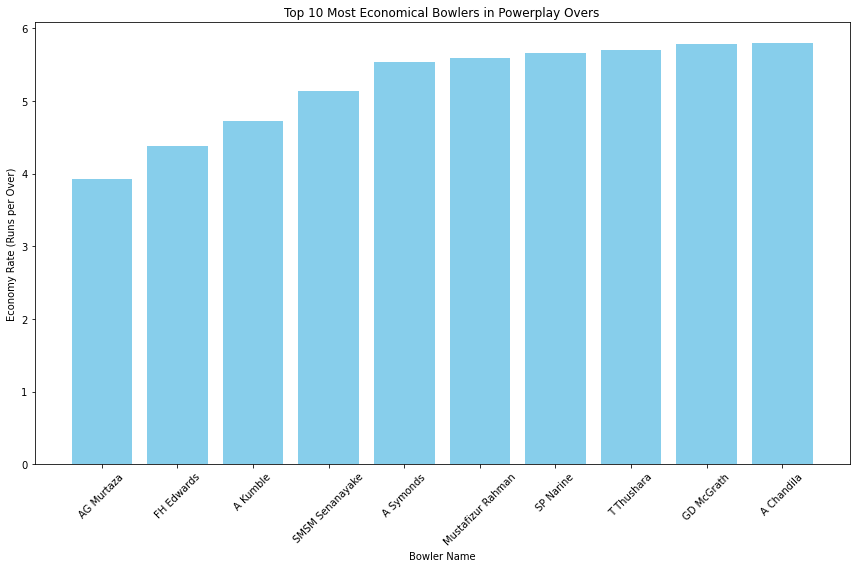

In [0]:
import matplotlib.pyplot as plt

# Convert DecimalType to float
economical_bowlers_pd['economy_rate'] = economical_bowlers_pd['economy_rate'].astype(float)

# Sort and select top 10
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'economy_rate')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['economy_rate'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Economy Rate (Runs per Over)')
plt.title('Top 10 Most Economical Bowlers in Powerplay Overs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


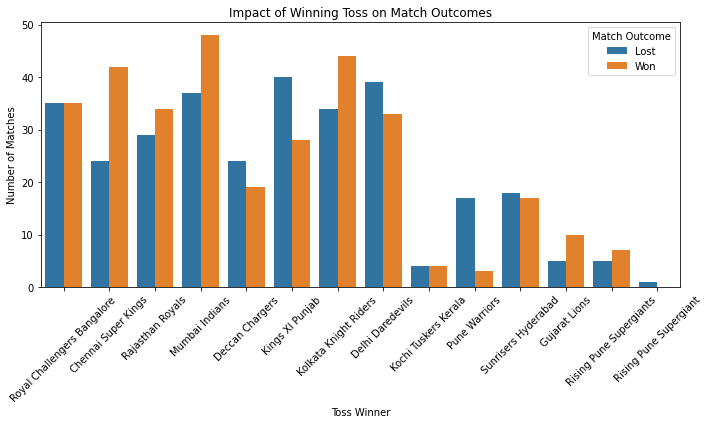

In [0]:
toss_impact_pd = toss_impact_individual_matches.toPandas()
import seaborn as sns
# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt. legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

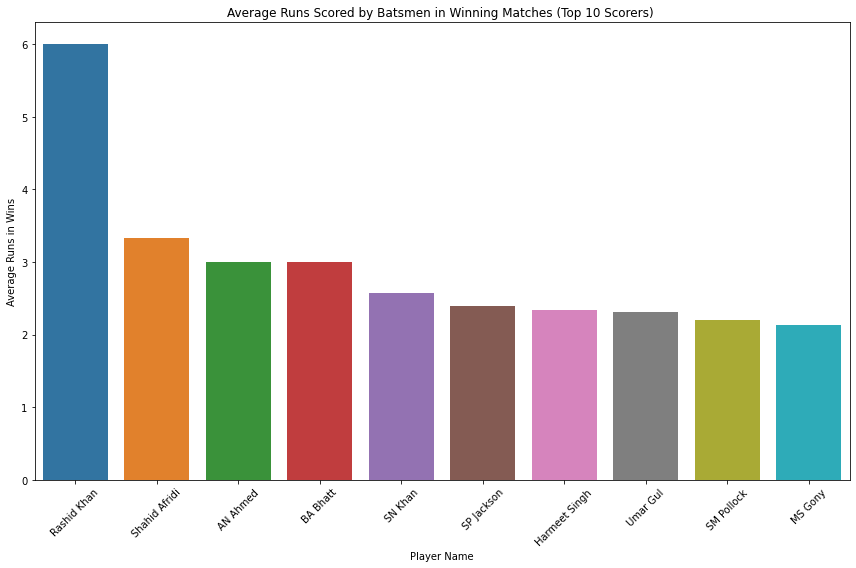

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins' )
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers) ')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
scores_by_venue = spark. sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
FROM ball_by_ball
JOIN match ON ball_by_ball.match_id = match.match_id
GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

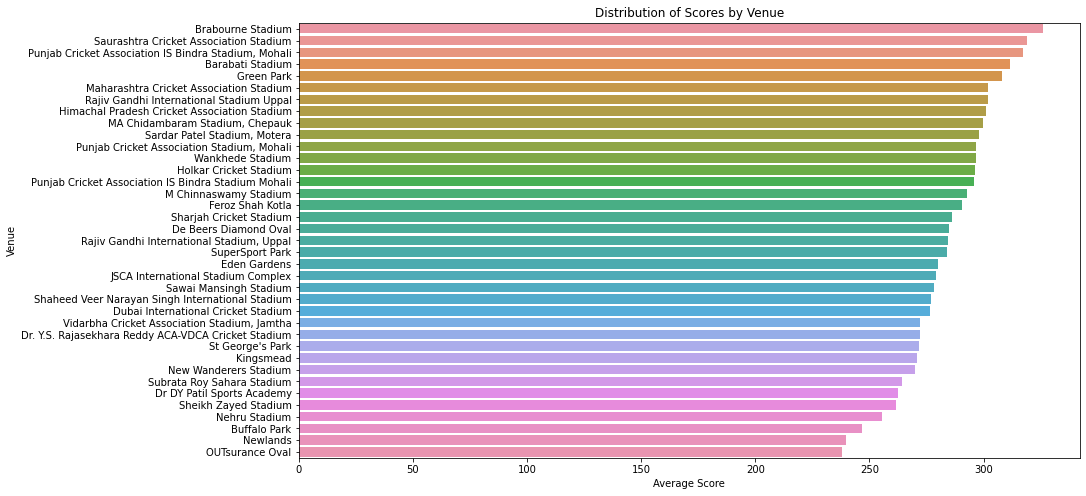

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
  AND out_type != 'Not Applicable'
GROUP BY out_type
ORDER BY frequency DESC
""")


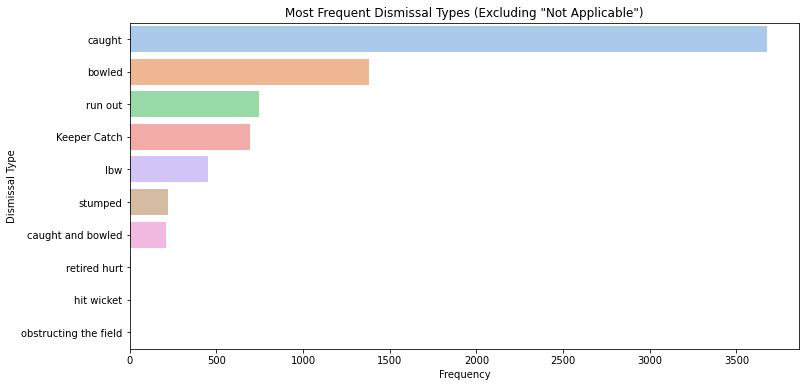

In [0]:
dismissal_types_pd = dismissal_types.toPandas()

plt.figure(figsize=(12,6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types (Excluding "Not Applicable")')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()


In [0]:
# Execute SQL Query
team_toss_win_performance = spark. sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

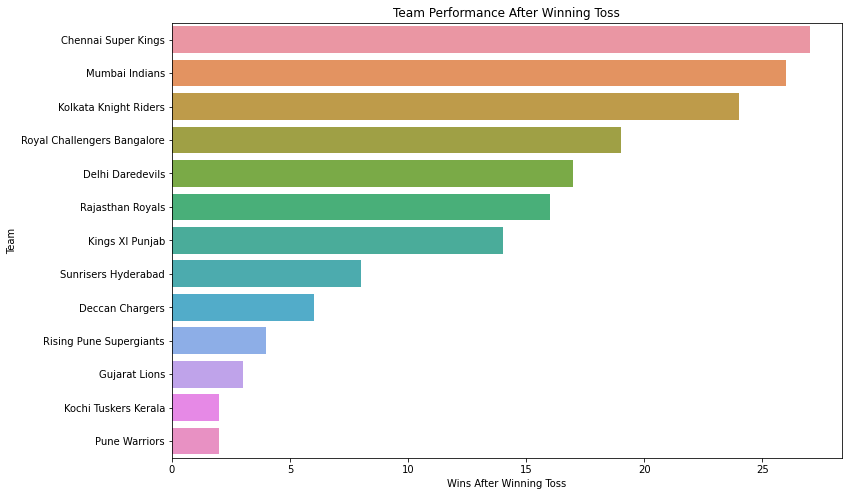

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()